In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset["train"].to_pandas()
df['job_posted_date']=pd.to_datetime(df.job_posted_date)
df["job_skills"]=df["job_skills"].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

Text(0, 0.5, 'count')

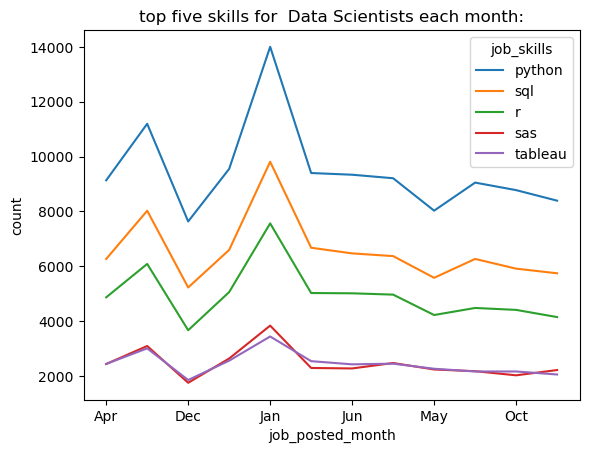

In [23]:
#top 5 Data Scientists Skills For each month:
df_Data_Scientist=df[df["job_title_short"]=="Data Scientist"].copy()
df_Data_Scientist['job_posted_month']=df_Data_Scientist['job_posted_date'].dt.strftime('%b')
df_DS_exploded= df_Data_Scientist.explode("job_skills")
df_DS_pivot=df_DS_exploded.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)

df_DS_pivot.loc['Total']=df_DS_pivot.sum()
df_DS_pivot=df_DS_pivot[df_DS_pivot.loc['Total'].sort_values(ascending=False).index]
df_DS_pivot=df_DS_pivot.drop('Total')
df_DS_pivot.iloc[:,:5].plot(kind="line")
plt.title("top five skills for  Data Scientists each month:")
plt.ylabel("count")

In [24]:
#scatter plots
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats


,median_salary,skill_count
job_skills,,
sql,120000.0,384849
python,125000.0,380909
aws,135000.0,145381
azure,125000.0,132527
r,119550.0,130892
tableau,111175.0,127213
excel,92500.0,127018
spark,140000.0,114609
power bi,102000.0,98147


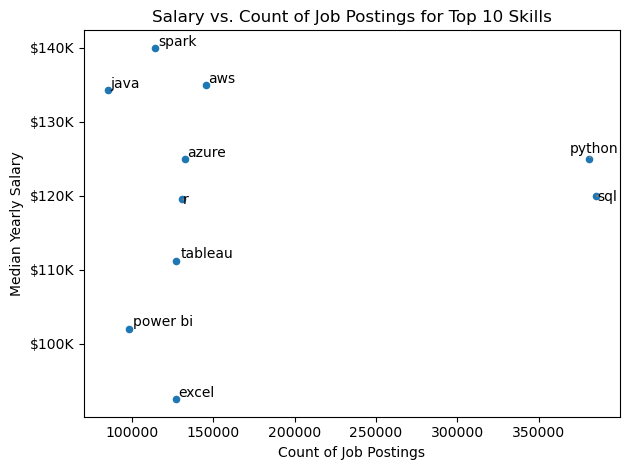

In [26]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
texts=[]
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))    
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) 
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()


plt.show()